In [70]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from tqdm import tqdm

In [71]:
#################### Chuanmudi Qin######################
##################### CSE 546 ##########################
####################### HW 1 ###########################
######################## A6 ############################

In [72]:
class RidgeReg:
    def __init__(self, Lambda=0.1,theta = None,Xmean=None,Ymean=None,std =None):
        self.regLambda= Lambda
        self.mean=Xmean
        self.Ymean=Ymean
        self.std = std
        self.theta = theta
        self.predictedY = None
           
    def __prep(self,Xtrain, Ytrain,k): 
        n = len(Ytrain)
        Ytrain_one_hot = np.zeros((n,k))
        # creating hot_one Y
        for i in range(0,n):
            Ytrain_one_hot[i,Ytrain[i]] = 1
            
        #zero mean std X and Y
        self.mean=np.mean(Xtrain,axis=0)
        self.Ymean=np.mean(Ytrain,axis=0)
        
        self.std=np.std(Xtrain,axis=0)
        self.std[self.std==0]=1
        
        #normalization
        Xtrain_tilda = (Xtrain- self.mean) /self.std
        Ytrain_tilda = Ytrain - self.Ymean
        
        return Xtrain_tilda, Ytrain_one_hot
        
    
    
    def train(self,Xtrain,Ytrain,k): 
        n = len(Ytrain)
        d=np.array(Xtrain).shape[1]
        # normalize 
        Xtrain_tilda, Ytrain_one_hot = self.__prep(Xtrain,Ytrain,k)
        # RHS (X'*X + \lambda*I)
        a= (np.dot(Xtrain_tilda.T,Xtrain_tilda))+self.regLambda * np.eye(d,d)
        
        # LHS X'*Y
        b=np.dot(Xtrain_tilda.T,Ytrain_one_hot)
        
        #solve the linear eq
        self.theta = linalg.solve(a, b)


    def predict(self,Xtest):
        #normalize input data with mean and std already calculated 
        X_tilta = (Xtest - self.mean) /self.std
        #(X-\mu)*w
        XW= np.dot(X_tilta, self.theta)+self.Ymean
        
        #(x-\mu)*w +y
        self.predictedY= np.argmax(XW, axis = 1)
        
    ###############################################################################################################
    ################### below are two revised version that takes X and Y but need preprocessing beforehand##########
    #################################################################################################################
    def train2(self, X, Y):
      d = X.shape[1]
      #zero mean std X and Y
      self.mean=np.mean(X,axis=0)
      self.Ymean=np.mean(Y,axis=0)
        
      self.std=np.std(X,axis=0)
      self.std[self.std==0]=1
        
      #normalization
      X = (X - self.mean) /self.std
      Y= Y - self.Ymean
      Xt_X_plus_lambda = np.dot(X.T, X) + self.regLambda * np.eye(d,d)
      Xt_Y = np.dot(X.T, Y)
      self.theta = np.linalg.solve(Xt_X_plus_lambda, Xt_Y)

    def predict2(self, X_prime):
      X_prime = (X_prime - self.mean) /self.std
      self.predictedY= np.argmax(np.dot(X_prime, self.theta)+self.Ymean, axis = 1)

##############################just one method###############################    
def error(sampleSize, predictedLabel, trueLabel): 
        wrongPrediction = 0
        for k,d in zip(predictedLabel,trueLabel): 
            if  (k-d).sum()!=0:
                wrongPrediction +=1
        res = 1/sampleSize * wrongPrediction
        print("the training/testing error is : {}".format(res) )
        return res
    
            
        

In [73]:
####################### LOAD MNIST DATA ###########################
mndata = MNIST('./data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

In [74]:
#################### Y one-hot representation #####################
Y_train = np.zeros((X_train.shape[0], 10))
for i,digit in enumerate(labels_train):
    Y_train[i, digit] = 1


In [75]:
################################ A6 (b) #####################################
#############################################################################
########################### Instantiate and train ###########################
rreg = RidgeReg(Lambda = 1E-4);
rreg.train2(X_train, Y_train)
rreg.predict2(X_train)
train_error = error(len(labels_train),rreg.predictedY, labels_train)
rreg.predict2(X_test)
train_error = error(len(labels_test),rreg.predictedY, labels_test)

the training/testing error is : 0.14226666666666668
the training/testing error is : 0.13970000000000002


In [76]:
################################################
#################### B1 ########################
#################### cross validation ##########
################################################

  0%|          | 0/30 [00:00<?, ?it/s]

p = 200 
......................Training.............


  3%|▎         | 1/30 [00:01<00:34,  1.18s/it]

the training/testing error is : 0.38029166666666664
..........................validation ing...............
the training/testing error is : 0.38525


p = 400 
......................Training.............


  7%|▋         | 2/30 [00:03<00:39,  1.40s/it]

the training/testing error is : 0.2521041666666667
..........................validation ing...............
the training/testing error is : 0.2643333333333333


p = 600 
......................Training.............


 10%|█         | 3/30 [00:05<00:49,  1.84s/it]

the training/testing error is : 0.19535416666666666
..........................validation ing...............
the training/testing error is : 0.2115


p = 800 
......................Training.............


 13%|█▎        | 4/30 [00:10<01:06,  2.56s/it]

the training/testing error is : 0.15589583333333332
..........................validation ing...............
the training/testing error is : 0.17341666666666666


p = 1000 
......................Training.............


 17%|█▋        | 5/30 [00:15<01:21,  3.25s/it]

the training/testing error is : 0.13193749999999999
..........................validation ing...............
the training/testing error is : 0.15291666666666667


p = 1200 
......................Training.............


 20%|██        | 6/30 [00:21<01:40,  4.20s/it]

the training/testing error is : 0.11947916666666666
..........................validation ing...............
the training/testing error is : 0.13716666666666666


p = 1400 
......................Training.............


 23%|██▎       | 7/30 [00:28<01:55,  5.03s/it]

the training/testing error is : 0.104875
..........................validation ing...............
the training/testing error is : 0.12425


p = 1600 
......................Training.............


 27%|██▋       | 8/30 [00:36<02:11,  5.97s/it]

the training/testing error is : 0.09029166666666666
..........................validation ing...............
the training/testing error is : 0.11233333333333333


p = 1800 
......................Training.............


 30%|███       | 9/30 [00:46<02:27,  7.04s/it]

the training/testing error is : 0.0836875
..........................validation ing...............
the training/testing error is : 0.10825


p = 2000 
......................Training.............


 33%|███▎      | 10/30 [00:57<02:44,  8.24s/it]

the training/testing error is : 0.07564583333333333
..........................validation ing...............
the training/testing error is : 0.09725


p = 2200 
......................Training.............


 37%|███▋      | 11/30 [01:09<03:01,  9.57s/it]

the training/testing error is : 0.06802083333333334
..........................validation ing...............
the training/testing error is : 0.09183333333333334


p = 2400 
......................Training.............


 40%|████      | 12/30 [01:24<03:21, 11.19s/it]

the training/testing error is : 0.06283333333333332
..........................validation ing...............
the training/testing error is : 0.08616666666666667


p = 2600 
......................Training.............
the training/testing error is : 0.057916666666666665
..........................validation ing...............


 43%|████▎     | 13/30 [01:42<03:41, 13.04s/it]

the training/testing error is : 0.08533333333333333


p = 2800 
......................Training.............
the training/testing error is : 0.05514583333333333
..........................validation ing...............
the training/testing error is : 0.08283333333333333




 47%|████▋     | 14/30 [02:03<04:05, 15.37s/it]

p = 3000 
......................Training.............
the training/testing error is : 0.050708333333333334
..........................validation ing...............


 50%|█████     | 15/30 [02:25<04:23, 17.59s/it]

the training/testing error is : 0.07816666666666666


p = 3200 
......................Training.............
the training/testing error is : 0.048
..........................validation ing...............


 53%|█████▎    | 16/30 [02:51<04:39, 19.93s/it]

the training/testing error is : 0.07133333333333333


p = 3400 
......................Training.............
the training/testing error is : 0.043854166666666666
..........................validation ing...............


 57%|█████▋    | 17/30 [03:18<04:49, 22.29s/it]

the training/testing error is : 0.07041666666666667


p = 3600 
......................Training.............
the training/testing error is : 0.041041666666666664
..........................validation ing...............


 60%|██████    | 18/30 [03:54<05:14, 26.21s/it]

the training/testing error is : 0.06683333333333333


p = 3800 
......................Training.............
the training/testing error is : 0.03720833333333333
..........................validation ing...............


 63%|██████▎   | 19/30 [04:28<05:13, 28.46s/it]

the training/testing error is : 0.066


p = 4000 
......................Training.............
the training/testing error is : 0.03639583333333333
..........................validation ing...............


 67%|██████▋   | 20/30 [05:09<05:24, 32.46s/it]

the training/testing error is : 0.06275


p = 4200 
......................Training.............
the training/testing error is : 0.03285416666666666
..........................validation ing...............


 70%|███████   | 21/30 [06:01<05:45, 38.34s/it]

the training/testing error is : 0.06366666666666666


p = 4400 
......................Training.............
the training/testing error is : 0.031625
..........................validation ing...............


 73%|███████▎  | 22/30 [06:53<05:38, 42.35s/it]

the training/testing error is : 0.06041666666666667


p = 4600 
......................Training.............
the training/testing error is : 0.029395833333333333
..........................validation ing...............


 77%|███████▋  | 23/30 [07:48<05:22, 46.14s/it]

the training/testing error is : 0.05983333333333333


p = 4800 
......................Training.............
the training/testing error is : 0.029145833333333333
..........................validation ing...............


 80%|████████  | 24/30 [08:48<05:02, 50.35s/it]

the training/testing error is : 0.05633333333333333


p = 5000 
......................Training.............
the training/testing error is : 0.0266875
..........................validation ing...............


 83%|████████▎ | 25/30 [09:52<04:31, 54.32s/it]

the training/testing error is : 0.057166666666666664


p = 5200 
......................Training.............
the training/testing error is : 0.025729166666666664
..........................validation ing...............


 87%|████████▋ | 26/30 [11:01<03:55, 58.83s/it]

the training/testing error is : 0.05558333333333333


p = 5400 
......................Training.............
the training/testing error is : 0.02402083333333333
..........................validation ing...............


 90%|█████████ | 27/30 [12:15<03:10, 63.34s/it]

the training/testing error is : 0.0535


p = 5600 
......................Training.............
the training/testing error is : 0.022666666666666665
..........................validation ing...............


 93%|█████████▎| 28/30 [13:41<02:20, 70.18s/it]

the training/testing error is : 0.05316666666666667


p = 5800 
......................Training.............
the training/testing error is : 0.0215
..........................validation ing...............


 97%|█████████▋| 29/30 [15:08<01:15, 75.30s/it]

the training/testing error is : 0.05383333333333333


p = 6000 
......................Training.............
the training/testing error is : 0.01983333333333333
..........................validation ing...............


100%|██████████| 30/30 [16:47<00:00, 33.58s/it]

the training/testing error is : 0.05275




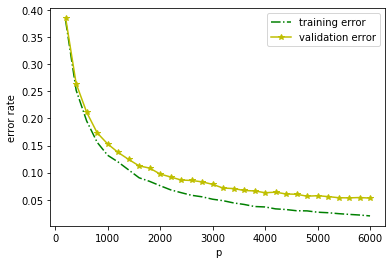

<Figure size 720x576 with 0 Axes>

In [84]:
portion = 0.8
ps = np.arange(200,6001,200)
all_train_errors = []
all_validation_errors = []
num_training= X_train.shape[0]
num_test= X_test.shape[0]
d = X_train.shape[1]

############### cross validation of shuffled data  #########################
shuffled_indices = np.arange(num_training)
np.random.shuffle(shuffled_indices)
train_indices = shuffled_indices[0:int(portion * num_training)]
validation_indices = shuffled_indices[int(portion * num_training) : ]

####################creating labels##########################
Yp_train = Y_train[train_indices, :]
labels_train_p = labels_train[train_indices]
labels_validate_p = labels_train[validation_indices]

optimal_theta = None
optimal_p = -1
minimized_error = 10**10
optimal_Xmean=None;
optimal_Ymean = None
optimal_std=None
for p in tqdm(ps):
    rreg = RidgeReg(Lambda = 1E-4);
    print("==================================================================")
    print("p = {} ".format(p))
    
    ######################### Generating G b h #########################
    G = np.random.normal(0, np.sqrt(0.1), size = (p,d))
    b = np.random.uniform(low=0, high=2*np.pi, size=(p,1)) 
    h = np.cos(np.dot(X_train, G.T) + b.T)
    

    ################# Getting train and validate #####################
    Xp_train = h[train_indices, :]
    Xp_validate = h[validation_indices, :]
    
    ################# training error ##########################
    print("......................Training.............")
    rreg.train2(Xp_train, Yp_train)
    rreg.predict2(Xp_train)
    train_error = error(len(labels_train_p), rreg.predictedY, labels_train_p)
    all_train_errors.append(train_error)
    
    ################### validation error ###############################
    print("..........................validation ing...............")
    rreg.predict2(Xp_validate)
    validation_error =error(len(labels_validate_p), rreg.predictedY, labels_validate_p)
    all_validation_errors.append(validation_error)
    print("\n")
    
    ####################save W and p ####################3333##############
    if(minimized_error > validation_error):
        minimized_error = validation_error
        optimal_theta= rreg.theta
        #print("the current minimal W has norm: {}".format(np.linalg.norm(optimal_theta)))
        optimal_p = p
        optimal_std = rreg.std
        optimal_Xmean = rreg.mean
        optimal_Ymean = rreg.Ymean
        



# Plot the results!
fig = plt.figure()
plt.plot(ps,all_train_errors,'g-.')
plt.plot(ps,all_validation_errors,'y-*')
plt.legend(["training error", "validation error"])
plt.xlabel('p')
plt.ylabel('error rate')
plt.figure(figsize=(10,8))
fig.savefig('B2.png')
plt.show()

In [11]:
##############################################################################################
#######################################B2 b###################################################
#######################################################################################3######

In [50]:
rreg = RidgeReg(Lambda = 1E-4, theta=np.array(optimal_theta),Xmean=optimal_Xmean,Ymean=optimal_Ymean,std =optimal_std);

In [51]:
######################### Generating G b h ########################
G= np.random.normal(0, np.sqrt(0.1), size = (optimal_p,d))
b = np.random.uniform(low=0, high=2*np.pi, size=(optimal_p,1)) 
h = np.cos(np.dot(X_test, G.T) + b.T)
print("the size of h is {0},the size of G is {1} ".format(h.shape,G.shape))
rreg.predict2(h)
test_error =error(len(labels_test), rreg.predictedY, labels_test)

the size of h is (10000, 6000),the size of G is (6000, 784) 
the training/testing error is : 0.9075000000000001


In [85]:
######################### interval ##########################
delta = 0.05
z = np.sqrt((np.log(2/delta))/(2*num_test))
print("the testing error is : {}". format(z))
left_bound = test_error - z
right_bound = test_error + z
print("the 95% confidence interval is ( {0} , {1} )".format(left_bound,right_bound))

the testing error is : 0.013581015157406196
the 95% confidence interval is ( 0.8939189848425939 , 0.9210810151574063 )


In [87]:
z

0.013581015157406196